In [1]:
#Based on Aki Taanila's Tilastoapu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
# Open the data
#df = pd.read_excel('data1_eng.xlsx')
df = pd.read_csv('WorkPlaceSatisfactionSurveyData.csv', sep = ';', decimal = ',')

In [3]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In the file MeansForCategoricalData.ipynb we were a bit daring and calculated the means for categorical variables like sat_management, sat_colleques etc.

Of course it is perfectly fine that you calculate the means (or some other numerical summary statistics) for numerical data. Let's do that next. 

In [4]:
#df.describe()
df[['age', 'years_of_service', 'salary']].describe().loc[['mean', 'std', 'count']].T

,mean,std,count
age,37.951220,9.773866,82.0
years_of_service,12.175000,8.807038,80.0
salary,2563.878049,849.350302,82.0


From the analysis point of view that information does not say much to us yet 

But it would be interresting to see the means with respect to some categorical variables. For example, how are the mean values for the male and female persons who have answered our survey.

Let's check that next

In [5]:
# By the way, notice that groupby method gives now the mean, std, count, etc. on column index - So, no need of .T or for loc[] 

df1 = df.groupby('gender')['salary'].describe()[['mean', 'std', 'count']]
df1.index=['men','women']
df1


,mean,std,count
men,2663.746032,930.061860,63.0
women,2232.736842,340.780451,19.0


This already tells us bit more about salaries. It **seems** that the average salary is higher for men than for women. But it this because of statistical variation just because of our sample from the population was maybe too small or can we somehow say with more confidence that there really is the difference? We will come back to this issue in the end of the notebook after we have first studied couple of other examples.

Now it would be nice to calculate the mean values for other variables than salary also with respect the gender variable. And I allow us to calculate those means also for variables measuring satisfaction levels - In addition to numerical variables age and years_of_service.

In [6]:
variable_list=['salary', 'age', 'years_of_service', 'sat management','sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']
df2 = df.groupby('gender')[variable_list].describe()
df2

salary                                                           \
        count         mean         std     min     25%     50%     75%   
gender                                                                   
1        63.0  2663.746032  930.061860  1521.0  2086.0  2417.0  2925.0   
2        19.0  2232.736842  340.780451  1715.0  1969.0  2144.0  2574.0   

                 age             ... sat_salary      sat_tasks            \
           max count       mean  ...        75%  max     count      mean   
gender                           ...                                       
1       6278.0  63.0  37.126984  ...        3.0  4.0      63.0  3.095238   
2       2729.0  19.0  40.684211  ...        3.0  5.0      19.0  3.526316   

                                           
             std  min  25%  50%  75%  max  
gender                                     
1       1.042860  1.0  2.0  3.0  4.0  5.0  
2       1.020263  1.0  3.0  4.0  4.0  5.0  

[2 rows x 64 columns]

Ok, I admit, that looks rather afwul! Too much information in one table already. Now it is beyond this course to know how to filter data out from this kind of table. Instead, let's use mean() method instead of describe() methods and it already looks much more readable.

In [7]:
df2 = df.groupby('gender')[variable_list].mean()
df2.index=['men','women']
df2

,salary,age,years_of_service,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
men,2663.746032,37.126984,11.475410,2.873016,4.129032,3.000000,1.904762,3.095238
women,2232.736842,40.684211,14.421053,3.684211,3.842105,3.947368,2.789474,3.526316


We can see that here may be difference in any of the cases above. However, it is maybe not fruitful to analyze difference in age or years_of_service now. But what about for example the difference in mean values for men and women for sat_management? Could that be just because of statistical variations for our sample? To better answer whether the difference is statistically significant we would need to test that. There are couple of test that we could utilize here. Let's consider now the Student's t-test.

But before we apply the test we need to know and consider couple of things. We need to know whether our samples for men and women for that variable sat_management are independent or dependent! And notice that the discussion below applies to many other cases/tests not just for the t-test.

# Independent and dependent samples

If the two samples are drawn from two different populations then the samples are independent. Also, within the same sample the part of the sample based on disjoint groups can be considered independent samples.

* For example, we can take a sample measuring the lifetime of the product where the product is manufactured with the method A and we can take another
sample with the product manufactured with method the B.
* Like for sat_management, sat_colleques,... we can consider that we have independent samples for men and women now.

Dependent samples often rise for example in the situation when the same experiment is repeated for the same study units (people or so).
* For example, we study the customer opinion before and after the product presentation.

# two-sided or one-sided test?

Consider now for example the means for men and women for the variable sat_management. We can see that the women seem to be somewhat happier to the management. So far we have discussed on the difference of that mean that we would like to know whether there is a difference between means for those two groups. But we could have asked something bit different! We could have asked whether women are more satisfied to management than men. In that respect we would have been dealing with the case that difference could be either way, either men are happier or unhappier than women. Hence, it would have been kind of two-sided situation. Then again, asking directly whether women are happier to management than men, is kind of a one-sided question. 

Depending the case, two-sided question (hypothesis) or the one-sided question (hypothesis) that of course has effect on our test. However, in our course we can consider that we are always testing our data in the two-sided manner. 

# Student's t-test


For us to be able to reliably use the t-test couple of conditions need to hold. 
* The test is for comparing two independent samples
* The sample size needs to be >30
* the values for the dependent variable are somewhat normally distributed

Let's now make the test for the case sat_management where our independent variable is the categorical variable gender.

In our case we are comparing the difference of satisfaction levels for men and women. The samples for men and women can be considered independent and
there are just two samples - samples for men and women. Also, already know that the sample size is >80, hence the first twho criteria hold.
For the third one we could perform test for normality but that topic is left for later. Instead, we can quickly examine the thing graphically.


<AxesSubplot:>

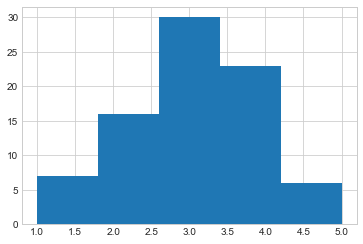

In [8]:
df['sat management'].hist(bins=5)

The histogram looks much like normal distribution, so let's continue with the t-test

In [9]:
# Forming the data for the groups to be compared
g1 = df['sat management'][df['gender'] == 1] # men
g2 = df['sat management'][df['gender'] == 2] # women

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(g1, g2, equal_var = False)    # The option equal_var refers to the case that you know or doubt that the two groups data would have different variance values. 
                                        # Variance is just std*std and hence measures the spead of the values around the mean value. Let's consider that a bit later

Ttest_indResult(statistic=-3.521725334447231, pvalue=0.0011399959961302436)

Now you need to know that the p-value is given for the two-sided t-test! Actually, if you would be interested in the one-sided case then your p-value would be just the half of the p-value for two-sided case.

The value that we just got is clearly less than the value 0.05 that we have considered as limit for statistical significance, in this case for the difference between the two groups. So based on the t-test we can say that there is difference between men and women with satisfaction level to management.

### Let's write finally the hypothesis which we are actually testing here down officially. 

H0, There is no difference between groups

H1: There is difference between groups

We accept the alternative hypothesis (H1) if the p value is below the significance level we choose for the experiment/for interpretation



| p value  |  Wording |
|---|---|
|  < 0.0001 |  Extremely significant |
|  0.0001 to 0.001 |  Extremely significant |
|  0.001 to 0.01 |  Very significant |
|  0.01 to 0.05 |  Significant |
|  ≥ 0.05 |  Not significant |



So the level p<0.05 is what we have been discussing we use during this course. This is because my examples are not that critical of their nature... But if your study would require more certainly in interpretation, you should adjust our p value limit accordingly.